In [1]:
def f(x): # 计算二次函数 f(x) = x^2 + 3x + 2
    return x * x + 3 * x + 2

def df(x): # 推导导数
    return 2*x + 3

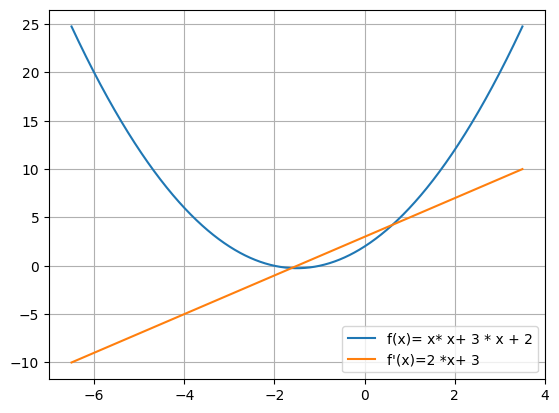

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 使用linspace生成x向量的序列
x= np.linspace(-6.5,3.5,1000)
y_f = f(x)# 计算函数值
y_df = df(x)# 计算导函数值

#绘制f和df的图像
plt.plot(x,y_f,label='f(x)= x* x+ 3 * x + 2')
plt.plot(x,y_df,label="f'(x)=2 *x+ 3")
plt .legend()
plt.grid(True)
plt.show()

In [5]:
def f(x):
    return x*x + 3*x + 2

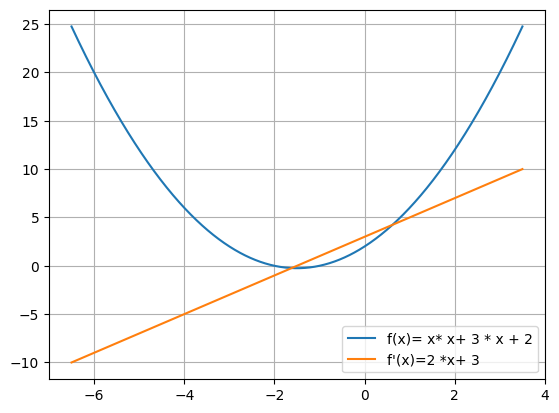

In [7]:
import torch
import matplotlib.pyplot as plt

# 使用linspace生成x向量的序列
x= torch.linspace(-6.5,3.5,1000,requires_grad = True)
y_f = f(x)# 计算函数值

# 使用backward函数计算梯度
# 梯度保存在x.grad中
y_f.sum().backward() # backward只能计算标量所以要求和后调用

y_df = x.grad.detach().numpy()
y_f = y_f.detach().numpy()
x = x.detach().numpy()

#绘制f和df的图像
plt.plot(x,y_f,label='f(x)= x* x+ 3 * x + 2')
plt.plot(x,y_df,label="f'(x)=2 *x+ 3")
plt .legend()
plt.grid(True)
plt.show()

In [9]:
x = torch.tensor([0.0],requires_grad=True)

y = f(x)
y.backward()

print("x的值：",x.data)
print("x的梯度：",x.grad.data)
print("验证，x的梯度值：",df(x).data)

x的值： tensor([0.])
x的梯度： tensor([3.])
验证，x的梯度值： tensor([3.])


In [11]:
x.grad.zero_() # 将梯度清零
y = f(x)
y.backward()

print("x的值：",x.data)
print("x的梯度：",x.grad.data)
print("验证，x的梯度值：",df(x).data)

x的值： tensor([0.])
x的梯度： tensor([3.])
验证，x的梯度值： tensor([3.])


In [12]:
# 不使用grad.zero
y = f(x)
y.backward()

print("x的值：",x.data)
print("x的梯度：",x.grad.data)
print("验证，x的梯度值：",df(x).data)

x的值： tensor([0.])
x的梯度： tensor([6.])
验证，x的梯度值： tensor([3.])


In [14]:
def f(x,y):
    return x**2 + y**2

x = torch.tensor([1.1],requires_grad=True)
y = torch.tensor([2.1],requires_grad=True)

n = 100
alpha = 0.05

for i in range(1,n+1):
    z = f(x,y)
    z.backward()
    
    x.data -= alpha * x.grad.data
    y.data -= alpha * y.grad.data
    
    x.grad.zero_()
    y.grad.zero_()
    
    print(f'After {i} iterations, '
          f'x = {x.item():.3f}, '
          f'y = {y.item():.3f}, '
          f'f(x,y) = {z.item():.3f}')

After 1 iterations, x = 0.990, y = 1.890, f(x,y) = 5.620
After 2 iterations, x = 0.891, y = 1.701, f(x,y) = 4.552
After 3 iterations, x = 0.802, y = 1.531, f(x,y) = 3.687
After 4 iterations, x = 0.722, y = 1.378, f(x,y) = 2.987
After 5 iterations, x = 0.650, y = 1.240, f(x,y) = 2.419
After 6 iterations, x = 0.585, y = 1.116, f(x,y) = 1.960
After 7 iterations, x = 0.526, y = 1.004, f(x,y) = 1.587
After 8 iterations, x = 0.474, y = 0.904, f(x,y) = 1.286
After 9 iterations, x = 0.426, y = 0.814, f(x,y) = 1.041
After 10 iterations, x = 0.384, y = 0.732, f(x,y) = 0.844
After 11 iterations, x = 0.345, y = 0.659, f(x,y) = 0.683
After 12 iterations, x = 0.311, y = 0.593, f(x,y) = 0.553
After 13 iterations, x = 0.280, y = 0.534, f(x,y) = 0.448
After 14 iterations, x = 0.252, y = 0.480, f(x,y) = 0.363
After 15 iterations, x = 0.226, y = 0.432, f(x,y) = 0.294
After 16 iterations, x = 0.204, y = 0.389, f(x,y) = 0.238
After 17 iterations, x = 0.183, y = 0.350, f(x,y) = 0.193
After 18 iterations, x 